# Initial State Uncertainty in PC-Gym

For a discrete dynamical system, as seen in PC-Gym, the initial state uncertainty is typically characterized as follows:
\begin{align*}
x_{t+1} &= f(x_t, u_t)\\
x_0 &\sim p_0(x_0)
\end{align*}
where $x_t$ is the state at time $t$, $u_t$ is the control input at time $t$, and $x_0$ is the initial state. 

In [1]:
import numpy as np
from pcgym import make_env
import matplotlib.pyplot as plt

In [2]:
env_params = {
    "model": "photo_production",
    "x0": np.array([0.1, 20.0, 0.01]),
    "tsim": 100,
    "N": 100,
    
    "a_space": {
        "low": np.array([0.0, 0.0]),
        "high": np.array([1000.0, 100.0])
    },
    
    # Extended observation space to include the uncertain initial states
    "o_space": {
        "low": np.array([0.0, 0.0, 0.0,]),  # Original states + uncertain states
        "high": np.array([10.0, 100.0, 10.0])  # Original states + uncertain states
    },
    
    "uncertainty_percentages": {
        "x0": [0.1, 0.1, 0.1]
    },
    
    "distribution": "uniform",

    "uncertainty_bounds": {
        "low": np.array([0.09, 18.0, 0.0]),
        "high": np.array([0.11, 22.0, 0.0])
    },
    
    "reward_states": ["c_q"],
    "maximise_reward": True,
    "r_scale": {"c_q": 1.0}
}


env = make_env(env_params=env_params)

c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


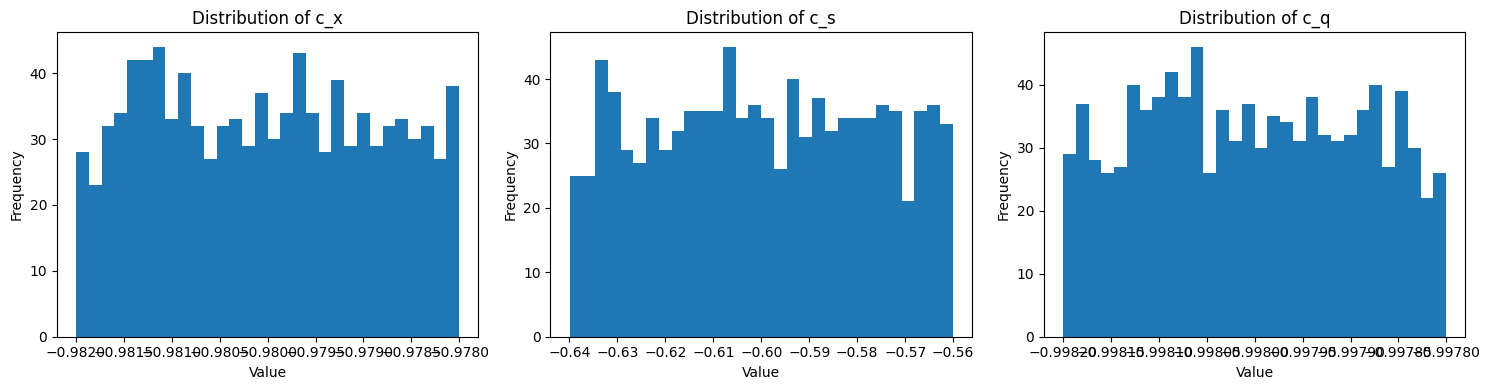

In [3]:
x0, _ = env.reset()
# Create multiple samples of initial states
n_samples = 1000
initial_states = np.array([env.reset()[0] for _ in range(n_samples)])

# Create a figure with subplots for each state dimension


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
state_names = ['c_x', 'c_s', 'c_q']

for i in range(3):
  axes[i].hist(initial_states[:, i], bins=30)
  axes[i].set_title(f'Distribution of {state_names[i]}')
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Frequency')

plt.tight_layout()